![Pharmacy wallpaper](https://i.pinimg.com/originals/9f/08/d5/9f08d5b07190918f066c318a31c01f66.jpg)

image credit:https://www.pinterest.com/

# Pymaceuticals

<span style="font-family:Papyrus; font-size:2.0em;">**Observations and Insights**</span>
 1. Dataset has almost equal number of <span style="color:green">**male (125)**</span> and <span style="color:green">**female (124) mice**</span>
 2. Topmost treatment regimens based on mean decrease in tumor volume are:
    * <span style="color:green">**Ramicane, Capomulin, Ceftamin and Infubinol**</span>
 3. Average final tumor volume was lowest for **Ramicane** and **Capomulin** had the least variability
 4. <span style="color:green">**Strong positive correlation**</span> between average final tumor volume and average mouse weight

## Data Analysis

In [1]:
# Import the neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
print("All neccessary libraries imported")

All neccessary libraries imported


In [2]:
# Data resources for mouse
mouse_metadata = "data/Mouse_metadata.csv"
# Data resources for results
study_results = "data/Study_results.csv"

In [3]:
# Read the mouse data into a dataframe
df_mouse = pd.read_csv(mouse_metadata)
# Let's see the shape and the first 5 rows of the dataframe
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" .format("df_mouse",df_mouse.shape)+'\033[0m')
df_mouse.head()

The shape of the df_mouse dataframe is (249, 5):


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Let's get the list of column headers of df_mouse
df_mouse.columns.values

array(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype=object)

In [5]:
# Basic information of the df_mouse dataframe by the info() method
df_mouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


#### Mouse ID, Drug Regimen, Sex are strings while Age_months, Weight (g) are integers

In [6]:
# Read the study_results into a dataframe
df_results = pd.read_csv(study_results)
# Let's see the shape and the first 5 rows of the dataframe
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" .format("df_results",df_results.shape)+'\033[0m')
df_results.head()

The shape of the df_results dataframe is (1893, 4):


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Let's get the list of column headers of df_results
df_results.columns.values

array(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype=object)

In [8]:
# Basic information of the df_results dataframe by the info() method
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


#### Mouse ID is string, Timepoint & Metastatic Sites are integers and Tumor Volume (mm3) is float

### Mouse ID column can be used as key for joining the datasets

In [9]:
# Combine the data into a single dataset
df_combined = pd.merge(df_results, df_mouse, how="outer", on="Mouse ID")
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" .format("df_combined",df_combined.shape)+'\033[0m')
df_combined.head()

The shape of the df_combined dataframe is (1893, 8):


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


### Let's explore the combined dataframe

In [10]:
# Let's see the column names in the dataframe
print(df_combined.columns.tolist())

['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']


In [11]:
# Let's see how many null objects we have in the dataframe
print(df_combined.isnull().sum())

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
dtype: int64


### Let's look for missing data in the combined dataframe

In [12]:
# Let's check for missing data
missing_data = df_combined.isnull()
# Let's count the number of missing data (if any)
for column in missing_data.columns.values.tolist():
    print("Missing Data Count:",missing_data[column].value_counts())

Missing Data Count: False    1893
Name: Mouse ID, dtype: int64
Missing Data Count: False    1893
Name: Timepoint, dtype: int64
Missing Data Count: False    1893
Name: Tumor Volume (mm3), dtype: int64
Missing Data Count: False    1893
Name: Metastatic Sites, dtype: int64
Missing Data Count: False    1893
Name: Drug Regimen, dtype: int64
Missing Data Count: False    1893
Name: Sex, dtype: int64
Missing Data Count: False    1893
Name: Age_months, dtype: int64
Missing Data Count: False    1893
Name: Weight (g), dtype: int64


### The combined dataframe has <span style="color:blue">**no missing data or null values**</span>

## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [13]:
# Let's see the unique drug regimen in the DataFrame
print(df_combined["Drug Regimen"].unique().tolist())

['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin']


### There are 10 drugs tested in this study. Let's see how many times each drug regimen was applied:

In [14]:
# Let's groupby Mouse ID column in the Dataframe to count treatment points for each mouse
grouped_mice = df_combined["Mouse ID"].groupby(df_combined["Mouse ID"]) # Create a GroupBy object
# Let's count the number of times each mice appears in the combined dataframe
mice_count = grouped_mice.count().to_frame("Count")
# Sorting the dataframe from lowest to highest
mice_count_sorted = mice_count.sort_values(by="Count",ascending=True)
# Let's reset index in the new dataframe
mice_count_sorted.reset_index(drop = False, inplace=True)
print('\033[96m'+'\033[1m'+"Minimum Count:\n {}" .format(mice_count_sorted.head())+'\033[0m')
print('\033[95m'+'\033[1m'+"Maximum Count:\n {}" .format(mice_count_sorted.tail())+'\033[0m')

Minimum Count:
   Mouse ID  Count
0     n482      1
1     f932      1
2     x336      1
3     t573      1
4     u153      1
Maximum Count:
     Mouse ID  Count
244     k862     10
245     k894     10
246     l471     10
247     l661     10
248     g989     13


### Conclusion: Number of times a drug regimen is applied varies from 13 to 1 in this study

## Statistics Table of the dataframe with all mice samples

In [15]:
# Let's groupby tumor volume in the Dataframe by each drug regimen
grouped_tumor = df_combined["Tumor Volume (mm3)"].groupby(df_combined["Drug Regimen"]) # Create a GroupBy object
# Let's calculate the mean of tumor volumes for each drug regimen
drug_mean = round(grouped_tumor.mean(),2)
# Let's calculate the median of tumor volumes for each drug regimen
drug_median = round(grouped_tumor.median(),2)
# Let's calculate the variance of tumor volumes for each drug regimen
drug_var = round(grouped_tumor.var(),2)
# Let's calculate the standard deviation (SD) of tumor volumes for each drug regimen
drug_std = round(grouped_tumor.std(),2)
# Let's calculate the Standard Error of the Mean (SEM) of tumor volumes for each drug regimen
drug_sem = round(grouped_tumor.sem(),2)
# Let's create a new DataFrame with the above series
df_statistics = pd.DataFrame({"Mean": drug_mean,\
                              "Median": drug_median,\
                              "Variance": drug_var,\
                              "Std_dev": drug_std,\
                              "SEM": drug_sem })
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is: {}" .format("df_statistics",df_statistics.shape)+'\033[0m')
df_statistics

The shape of the df_statistics dataframe is: (10, 5)


,Mean,Median,Variance,Std_dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Statistics Table of mice samples tested more than once 

### Mice ID appearing once implies the particular mice was treated only once at Timepoint = 0

In [16]:
# Let's filter the dataframe of mice receiving treatment only once
mice_unity_count = mice_count_sorted.loc[mice_count_sorted["Count"] == 1]
# Creating a list of mice recieving treatment only once
mice_list = mice_unity_count["Mouse ID"].tolist()
# Create a new dataframe with mice receiving treatment more than once
df_combinedB = df_combined[~df_combined["Mouse ID"].isin(mice_list)]
# Let's groupby tumor volume in the Dataframe by each drug regimen
grouped_tumor = df_combinedB["Tumor Volume (mm3)"].groupby(df_combinedB["Drug Regimen"]) # Create a GroupBy object
# Let's calculate the mean of tumor volumes for each drug regimen
drug_mean = round(grouped_tumor.mean(),2)
# Let's calculate the median of tumor volumes for each drug regimen
drug_median = round(grouped_tumor.median(),2)
# Let's calculate the variance of tumor volumes for each drug regimen
drug_var = round(grouped_tumor.var(),2)
# Let's calculate the standard deviation (SD) of tumor volumes for each drug regimen
drug_std = round(grouped_tumor.std(),2)
# Let's calculate the Standard Error of the Mean (SEM) of tumor volumes for each drug regimen
drug_sem = round(grouped_tumor.sem(),2)
# Let's create a new DataFrame with the above series
df_statisticsB = pd.DataFrame({"Mean": drug_mean,\
                              "Median": drug_median,\
                              "Variance": drug_var,\
                              "Std_dev": drug_std,\
                              "SEM": drug_sem })
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is: {}" .format("df_statisticsB",df_statisticsB.shape)+'\033[0m')
df_statisticsB

The shape of the df_statisticsB dataframe is: (10, 5)


,Mean,Median,Variance,Std_dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.77,51.91,38.84,6.23,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.35,53.74,68.15,8.26,0.61
Naftisol,54.43,52.54,65.93,8.12,0.60
Placebo,54.08,52.32,61.05,7.81,0.58
Propriva,52.37,50.91,42.28,6.50,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.28,52.49,59.30,7.70,0.57


## Conclusion: Mice tested once belonged to Drug Regimens: <span style="color:blue"> Ketapril, Naftisol, Stelasyn,Zoniferol, Placebo, Ceftamin and Propiva</span>

# Bar plots

### Generate a bar plot showing number of data points for each treatment regimen using pandas

In [17]:
# Let's groupby drug regimen column in the Dataframe by each drug regimen
grouped_count = df_combined["Drug Regimen"].groupby(df_combined["Drug Regimen"]) # Create a GroupBy object
# Let's create a dataframe with the number of data points for each drug regimen
drug_count = grouped_count.count().to_frame("Count").reset_index()
drug_count

,Drug Regimen,Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0, 0.5, 'Count')

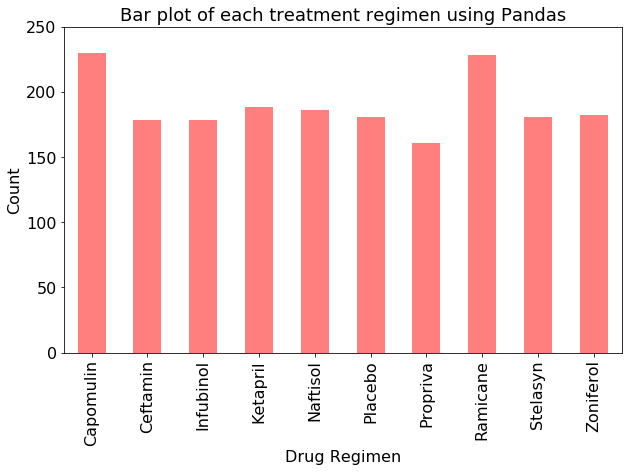

In [18]:
# Creating a vertical bar plot using plot() function of Pandas
ax = drug_count.plot(kind='bar', x = "Drug Regimen", y = "Count", \
                color = "red", alpha = 0.5, grid = False ,\
                fontsize = 16, ylim =(0,250),legend = False,\
                rot = 90,position = 0.5,figsize=(10,6))
# Set the title, x & y labels for the bar plot
ax.set_title("Bar plot of each treatment regimen using Pandas",color="black",fontsize = 18)
ax.set_xlabel("Drug Regimen",color="black",fontsize=16)
ax.set_ylabel("Count",color="black",fontsize=16)

### Generate a bar plot showing number of data points for each treatment regimen using pyplot

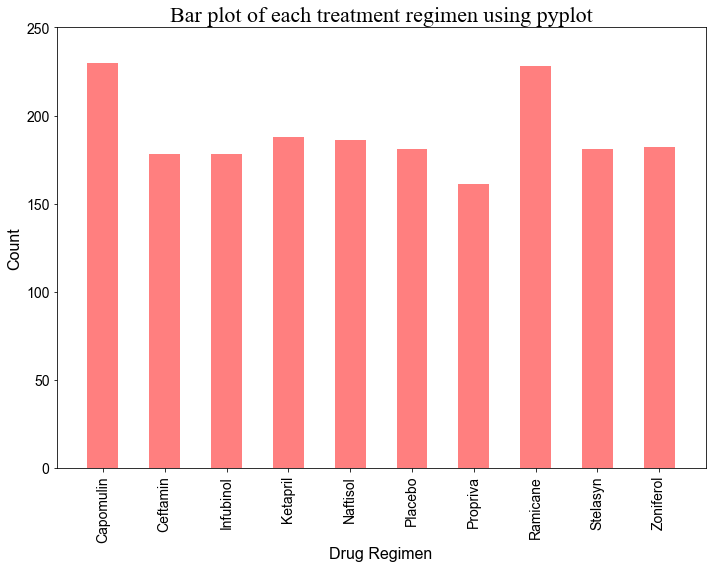

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Define x_axis for the plot
x_axis = np.arange(len(drug_count["Drug Regimen"]))
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_count["Drug Regimen"],rotation=90,fontsize=14,**labelfont)
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(drug_count["Count"])+20)
plt.yticks(fontsize=14, **labelfont)
# Give our chart some labels and a tile
plt.title("Bar plot of each treatment regimen using pyplot",fontsize = 22,**titlefont)
plt.xlabel("Drug Regimen",fontsize = 16,**labelfont)
plt.ylabel("Count",fontsize = 16,**labelfont)
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, drug_count["Count"],width=0.5,color="red",alpha=0.5, align="center")
# Ensure that the x_labels show in the plot
plt.tight_layout()
plt.show() # Display the plot

###  Bar graph plotted using pyplot combined with a colormap

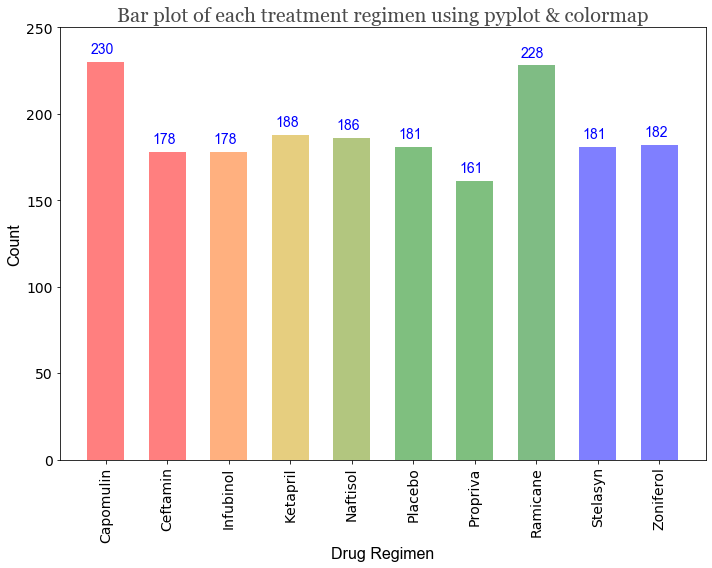

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
# Create a font library
titlefont = {"fontname":"Georgia"}
labelfont = {"fontname":"Arial"}
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Define a color list
clist = [(0,"red"),(0.125,"red"),(0.25,"orange"),(0.5,"green"),(0.7,"green"),(0.75,"blue"),(1,"blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("",clist)
# Define x_axis for the plot
x_axis = np.arange(len(drug_count["Drug Regimen"]))
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_count["Drug Regimen"],rotation=90,fontsize=14)
plt.yticks(fontsize=14)
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(drug_count["Count"])+20)
# Give our chart some labels and a tile
plt.title("Bar plot of each treatment regimen using pyplot & colormap",fontsize=20,color="black",alpha=0.7,**titlefont)
plt.xlabel("Drug Regimen",fontsize = 16,**labelfont)
plt.ylabel("Count",fontsize = 16,**labelfont)
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, drug_count["Count"], width = 0.6,color= rvb(x_axis/len(drug_count["Drug Regimen"])),alpha=0.5, align="center")
for index,value in enumerate(drug_count["Count"]):
    # Create the labels
    label = int(value)
    # annotate text within each bar
    plt.annotate(label,xy=(index-0.25,value+5),color = 'blue',fontsize=14,**labelfont)
# Ensure that the x_labels show in the plot
plt.tight_layout()
plt.show() # Display the plot

# Pie plots

### Generate a pie plot showing the distribution of female versus male mice using pandas

In [21]:
# Count the total number of mice in the dataset
no_of_mice = len(df_combined["Mouse ID"].value_counts())
print('\033[96m'+'\033[1m'+"Total number of mice in the study is: {}" .format(no_of_mice)+'\033[0m')

Total number of mice in the study is: 249


In [22]:
# Let's copy the combined dataframe to a new dataframe
df_gender = df_combined.copy()
# Let's drop duplicate Mouse IDs from this new dataframe
df_gender.drop_duplicates(subset="Mouse ID",keep = 'first', inplace = True)
# Let's reset index in the new dataframe
df_gender.reset_index(drop = True, inplace = True)
# Let's groupby Mouse ID column in the Dataframe by gender of mouse
grouped_gender = df_gender["Mouse ID"].groupby(df_gender["Sex"]) # Create a GroupBy object
# Let's create a dataframe with the gender of mouse in the dataset
gender_count = grouped_gender.count().to_frame("Count").reset_index()
# Let's create a percentage column in the gender dataframe
gender_count["Percent Count"] = round(100*(gender_count["Count"]/gender_count["Count"].sum(axis=0)),2)
# Make the gender, i.e. Sex column as index
gender_count.set_index("Sex",drop = True,inplace = True)
gender_count # Display the dataframe

,Count,Percent Count
Sex,,
Female,124,49.8
Male,125,50.2


### <span style="color:blue">There are 124 (49.8%) female mice and 125 (50.2%) male mice in the study</span>

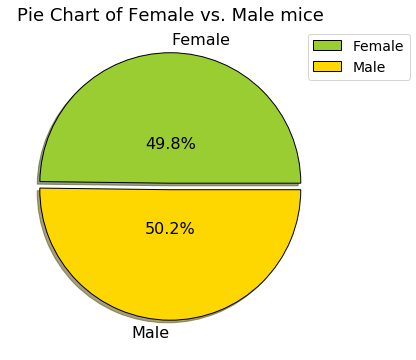

In [23]:
# Let's draw a pie chart using plot function of panda's dataframe
ax = gender_count.plot(kind="pie", y="Percent Count",\
                  figsize = (6,6),\
                  autopct = "%1.1f%%",\
                  pctdistance = 0.3,\
                  colors = ["yellowgreen","gold"],\
                  wedgeprops = {"edgecolor":"0","linewidth":1},\
                  startangle = 0,\
                  explode = [0.05,0],\
                  fontsize = 16,\
                  shadow = True)
# Remove y_label since the % value is already inside the chart
ax.set_ylabel("")
# Set the title of the pie chart
ax.set_title("Pie Chart of Female vs. Male mice",color="black",fontsize = 18)
# Place the legend and set legend fontsize
ax.legend(bbox_to_anchor=(0.9,1.0), prop={"size":14})

### Generate a pie plot showing the distribution of female versus male mice using pyplot

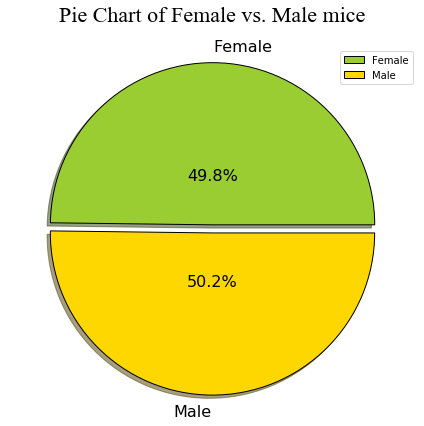

In [24]:
import matplotlib.pyplot as plt
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Let's make a colors list
colors_list = ["yellowgreen","gold"]
# Explode list for better visualization
explode_list=[0.05,0]
# Draw the pie chart
gender_count.plot(kind="pie", y="Percent Count",\
                  figsize = (6,6),\
                  autopct = "%1.1f%%",\
                  startangle = 0,\
                  pctdistance = 0.3,\
                  wedgeprops = {"edgecolor":"0","linewidth":1},\
                  colors = colors_list,\
                  explode = explode_list,\
                  textprops = {"fontsize":16},\
                  shadow = True)
# Display the title, legend and ensure that the pie chart is a circle
plt.title("Pie Chart of Female vs. Male mice", fontsize=22,y = 1.05,**titlefont)
plt.ylabel('') # Remove the y axis label
plt.legend(loc="best") # Place the legend
plt.axis("equal") # Make sure that the plot is a circle
plt.tight_layout()
plt.show()

# Quartiles, outliers and boxplots

## Determining the most promising treatment regimens

In [25]:
# Let's copy the combined dataframe to a new dataframe
df_treatment = df_combined.copy()
# Let's sort the dataframe on the timepoint
df_treatment.sort_values(by="Timepoint",ascending=False)
# Let's make a new dataframe with only the begining timepoints
df_start_points = df_treatment.drop_duplicates(subset="Mouse ID",keep = 'first')
# Let's keep only the columns needed for this analysis
df_start = df_start_points[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
# Let's rename the columns in the starting dataframe
df_treatment_start = df_start.rename(columns={"Timepoint":"Start_time","Tumor Volume (mm3)":"Start_tumor_vol"})
# Let's reset index in the new dataframe
df_treatment_start.reset_index(drop = True, inplace = True)
df_treatment_start.head() # Display the first 5 rows

,Mouse ID,Start_time,Start_tumor_vol
0,b128,0,45.0
1,f932,0,45.0
2,g107,0,45.0
3,a457,0,45.0
4,c819,0,45.0


In [26]:
# Let's make another dataframe with only the end timepoints
df_end_points = df_treatment.drop_duplicates(subset="Mouse ID",keep = 'last')
# Let's keep only the columns needed for this analysis
df_end = df_end_points[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
# Let's rename the columns in the end dataframe
df_treatment_end = df_end.rename(columns={"Timepoint":"End_time","Tumor Volume (mm3)":"End_tumor_vol"})
# Let's reset index in the new dataframe
df_treatment_end.reset_index(drop = True, inplace = True)
df_treatment_end.head() # Display the first 5 rows

,Mouse ID,End_time,End_tumor_vol,Drug Regimen
0,b128,45,38.982878,Capomulin
1,f932,0,45.000000,Ketapril
2,g107,35,71.905117,Ketapril
3,a457,10,49.783419,Ketapril
4,c819,40,62.175705,Ketapril


In [27]:
# Combine both the start and end timing dataframe into a single dataframe
df_combined_vol = pd.merge(df_treatment_start, df_treatment_end, how="outer", on="Mouse ID")
# Let us calculate the duration of study for each mouse
df_combined_vol["Study Duration"] = df_combined_vol["End_time"] - df_combined_vol["Start_time"]
# Let us calculate the change in tumor volume for each mouse
df_combined_vol["Tumor_vol_change"] = df_combined_vol["Start_tumor_vol"] - df_combined_vol["End_tumor_vol"]
# Let us finalize a dataframe containing Mouse ID, Drug Regimen, Study Duration and Tumor_vol_change
df_tumor_deltaV = df_combined_vol[["Mouse ID","Drug Regimen","Study Duration","Tumor_vol_change"]]
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" \
      .format("df_tumor_deltaV",df_tumor_deltaV.shape)+'\033[0m')
df_tumor_deltaV.head()

The shape of the df_tumor_deltaV dataframe is (249, 4):


,Mouse ID,Drug Regimen,Study Duration,Tumor_vol_change
0,b128,Capomulin,45,6.017122
1,f932,Ketapril,0,0.000000
2,g107,Ketapril,35,-26.905117
3,a457,Ketapril,10,-4.783419
4,c819,Ketapril,40,-17.175705


### Let's delete the rows with null Study Duration from the dataframe

In [28]:
# First we get the indexes where Study Duration is null
indexList = df_tumor_deltaV[df_tumor_deltaV["Study Duration"] == 0].index
# We drop those indexes from the dataframe and create a new one
df_tumor_change = df_tumor_deltaV.drop(indexList)
# Let's reset index in the new dataframe
df_tumor_change.reset_index(drop = True,inplace=True)
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe after row deletion is {}:" \
      .format("df_tumor_change",df_tumor_change.shape)+'\033[0m')
df_tumor_change.head()

The shape of the df_tumor_change dataframe after row deletion is (237, 4):


,Mouse ID,Drug Regimen,Study Duration,Tumor_vol_change
0,b128,Capomulin,45,6.017122
1,g107,Ketapril,35,-26.905117
2,a457,Ketapril,10,-4.783419
3,c819,Ketapril,40,-17.175705
4,h246,Ketapril,45,-29.104086


### Conclusion: There were 12 mice in the study with null study duration

### What is the average study duration of each regimen ?

In [29]:
# Let's groupby Study Duration column in the Dataframe by each drug regimen
grouped_study_dur = df_tumor_change["Study Duration"].groupby(df_tumor_change["Drug Regimen"]) # Create a GroupBy object
# Let's create a dataframe with the average tumor volume change for each drug regimen
drug_duration = round(grouped_study_dur.mean(),2).to_frame("Mean Duration").reset_index()
drug_duration.head() # Display the dataframe

,Drug Regimen,Mean Duration
0,Capomulin,41.00
1,Ceftamin,36.43
2,Infubinol,30.60
3,Ketapril,35.43
4,Naftisol,35.00


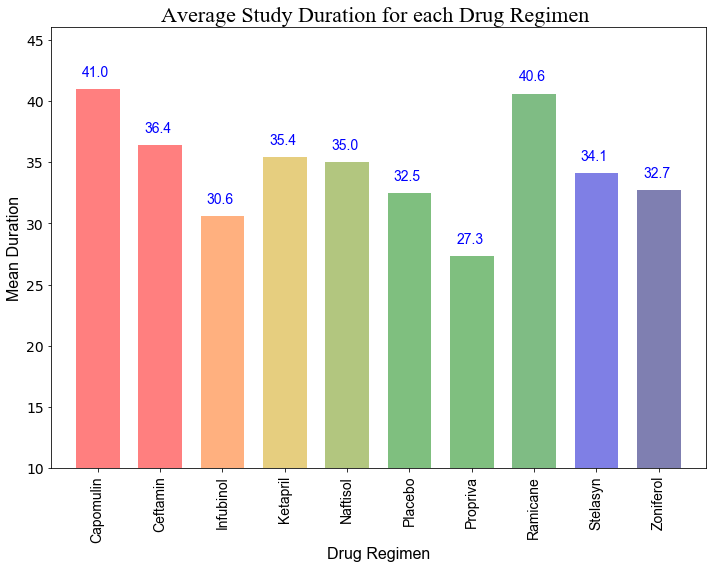

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Define a color list
clist = [(0,"red"),(0.125,"red"),(0.25,"orange"),(0.5,"green"),(0.7,"green"),(0.75,"blue"),(1,"black")]
rvb = mcolors.LinearSegmentedColormap.from_list("",clist)
# Define x_axis for the plot
x_axis = np.arange(len(drug_duration["Drug Regimen"]))
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_duration["Drug Regimen"],rotation=90,fontsize=14,**labelfont)
plt.yticks(fontsize=14)
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(10, max(drug_duration["Mean Duration"])+5)
# Give our chart x & y axis labels and a title
plt.title("Average Study Duration for each Drug Regimen ",fontsize=22,**titlefont)
plt.xlabel("Drug Regimen",fontsize = 16,**labelfont)
plt.ylabel("Mean Duration",fontsize = 16,**labelfont)
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, drug_duration["Mean Duration"],width = 0.7,\
        color= rvb(x_axis/len(drug_duration["Drug Regimen"])),alpha=0.5, align="center")
for index,value in enumerate(drug_duration["Mean Duration"]):
    # format value to fit inside the bar
    label = round(value,1)
    # annotate text within each bar
    plt.annotate(label,xy=(index-0.25,value+1.05),color = 'blue',fontsize=14,**labelfont)
# Ensure that the x_labels show in the plot
plt.tight_layout()
plt.show() # Display the plot# Define the figure size

### What is the average tumor volume change of each regimen ?

In [31]:
# Let's groupby Tumor volume change column in the Dataframe by each drug regimen
grouped_tumor_vol = df_tumor_change["Tumor_vol_change"].groupby(df_tumor_change["Drug Regimen"]) # Create a GroupBy object
# Let's create a dataframe with the average tumor volume change for each drug regimen
drug_tumor = round(grouped_tumor_vol.mean(),3).to_frame("Mean Vol Change").reset_index()
drug_tumor.head() # Display the dataframe

,Drug Regimen,Mean Vol Change
0,Capomulin,8.332
1,Ceftamin,-15.183
2,Infubinol,-13.178
3,Ketapril,-19.355
4,Naftisol,-17.615


### Let's visualize the average tumor volume change

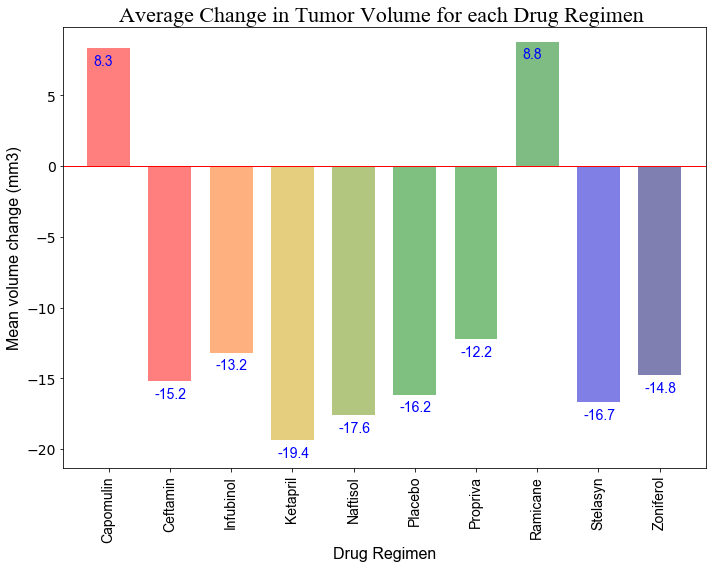

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Define a color list
clist = [(0,"red"),(0.125,"red"),(0.25,"orange"),(0.5,"green"),(0.7,"green"),(0.75,"blue"),(1,"black")]
rvb = mcolors.LinearSegmentedColormap.from_list("",clist)
# Define x_axis for the plot
x_axis = np.arange(len(drug_tumor["Drug Regimen"]))
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_tumor["Drug Regimen"],rotation=90,fontsize=14,**labelfont)
plt.yticks(fontsize=14)
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(min(drug_tumor["Mean Vol Change"])-2, max(drug_tumor["Mean Vol Change"])+1)
# Display the horizontal x-axis 
plt.hlines(0,-0.75,len(x_axis),colors="red",linestyles="solid",linewidth=1)
# Give our chart x & y-axis labels and a title
plt.title("Average Change in Tumor Volume for each Drug Regimen ",fontsize=22,**titlefont)
plt.xlabel("Drug Regimen",fontsize = 16,**labelfont)
plt.ylabel("Mean volume change (mm3)",fontsize = 16,**labelfont)
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, drug_tumor["Mean Vol Change"],width = 0.7,\
        color= rvb(x_axis/len(drug_tumor["Drug Regimen"])),alpha=0.5, align="center")
for index,value in enumerate(drug_tumor["Mean Vol Change"]):
    # format value to fit inside the bar
    label = round(value,1)
    # annotate text within each bar
    plt.annotate(label,xy=(index-0.25,value-1.2),color = 'blue',fontsize=14,**labelfont)
# Ensure that the x_labels show in the plot
plt.tight_layout()
plt.show() # Display the plot

### Each Drug Regimen ran for different time durations, to compare we need to standardize the duration
#### In the combined dataframe we estimate the mean volume change for each Drug Regimen for time duration = 25

In [33]:
# Combine both average study duration and average tumor volume change into a single dataframe
df_time_vol = pd.merge(drug_duration, drug_tumor, how="left", on="Drug Regimen")
# Let's calculate the rate of change for each drug regimen and add it as a column in the dataframe
df_time_vol["Rate of Change"] = round((df_time_vol["Mean Vol Change"]/df_time_vol["Mean Duration"]),3)
# Let's estimate the volume change for duration = 25 for all regimens
df_time_vol["Est Vol Change"] = round((df_time_vol["Rate of Change"]*25),3)
df_time_vol # Display the combined dataframe

,Drug Regimen,Mean Duration,Mean Vol Change,Rate of Change,Est Vol Change
0,Capomulin,41.00,8.332,0.203,5.075
1,Ceftamin,36.43,-15.183,-0.417,-10.425
2,Infubinol,30.60,-13.178,-0.431,-10.775
3,Ketapril,35.43,-19.355,-0.546,-13.650
4,Naftisol,35.00,-17.615,-0.503,-12.575
5,Placebo,32.50,-16.155,-0.497,-12.425
6,Propriva,27.29,-12.226,-0.448,-11.200
7,Ramicane,40.60,8.809,0.217,5.425
8,Stelasyn,34.13,-16.697,-0.489,-12.225
9,Zoniferol,32.71,-14.772,-0.452,-11.300


In [34]:
# Let's sort the dataframe to find the top most Drug Regimens
drug_tumor_sorted = df_time_vol.sort_values(by="Est Vol Change",ascending=False)
# Let's reset index in the new dataframe
drug_tumor_sorted.reset_index(drop = True, inplace=True)
drug_tumor_sorted.head()

,Drug Regimen,Mean Duration,Mean Vol Change,Rate of Change,Est Vol Change
0,Ramicane,40.60,8.809,0.217,5.425
1,Capomulin,41.00,8.332,0.203,5.075
2,Ceftamin,36.43,-15.183,-0.417,-10.425
3,Infubinol,30.60,-13.178,-0.431,-10.775
4,Propriva,27.29,-12.226,-0.448,-11.200


### Topmost treatment regimens based on mean decrease in tumor volume are: 
## <span style="color:blue"> Ramicane, Capomulin, Ceftamin and Infubinol</span>

## Calculating the final tumor volume of each mouse across these four treatment regimens

In [35]:
# Let's create a list of 4 best treatment regimens
top_regimen_list = ["Ramicane","Capomulin","Infubinol","Ceftamin"]
# We select the rows with top 4 promising treatments
df_best_select = df_treatment_end[df_treatment_end["Drug Regimen"].isin(top_regimen_list)]
# Let's sort the dataframe to find the top most Drug Regimens
df_top_four = df_best_select.sort_values(by="Drug Regimen",ascending=True)
# Let's reset index in the new dataframe
df_top_four.reset_index(drop = True, inplace=True)
print('\033[96m'+'\033[1m'+"The shape of the top 4 regimen dataframe {} is:{}" \
      .format("df_top_four",df_top_four.shape)+'\033[0m')
df_top_four.head()

The shape of the top 4 regimen dataframe df_top_four is:(100, 4)


,Mouse ID,End_time,End_tumor_vol,Drug Regimen
0,b128,45,38.982878,Capomulin
1,r554,45,32.377357,Capomulin
2,s185,45,23.343598,Capomulin
3,b742,45,38.939633,Capomulin
4,x401,45,28.484033,Capomulin


In [36]:
# Let's groupby End Tumor Volume in the Dataframe by each Drug Regimen
grouped_regimen = df_top_four["End_tumor_vol"].groupby(df_top_four["Drug Regimen"]) # Create a GroupBy object
# Let's calculate the mean
regimen_mean = round(grouped_regimen.mean(),2)
# Let's calculate the lower quartile
regimen_lowerq = round(grouped_regimen.quantile(.25),2)
# Let's calculate the median
regimen_median = round(grouped_regimen.quantile(.5),2)
# Let's calculate the upper quartile
regimen_upperq = round(grouped_regimen.quantile(.75),2)
# Let's create a new DataFrame
regimen_statistics = pd.DataFrame({"Mean": regimen_mean,\
                                   "Median": regimen_median,\
                                   "Lower Quartile":regimen_lowerq,\
                                   "Upper Quartile":regimen_upperq})
# Let's create a new column for inter-quartile range (IQR)
regimen_statistics["IQR"] = regimen_statistics["Upper Quartile"]-regimen_statistics["Lower Quartile"]
# Let's create a new column for upper_bound = upperq + (1.5*iqr) 
regimen_statistics["Upper Bound"] = regimen_statistics["Upper Quartile"] + (1.5*regimen_statistics["IQR"])
# Let's create a new column for lower_bound = lowerq - (1.5*iqr) 
regimen_statistics["Lower Bound"] = regimen_statistics["Lower Quartile"] - (1.5*regimen_statistics["IQR"])
regimen_statistics

,Mean,Median,Lower Quartile,Upper Quartile,IQR,Upper Bound,Lower Bound
Drug Regimen,,,,,,,
Capomulin,36.67,38.13,32.38,40.16,7.78,51.83,20.71
Ceftamin,57.75,59.85,48.72,64.30,15.58,87.67,25.35
Infubinol,58.18,60.17,54.05,65.53,11.48,82.75,36.83
Ramicane,36.19,36.56,31.56,40.66,9.10,54.31,17.91


### Determining potential Outliers in the top four Drug Regimens

In [37]:
# We select the Drug Regimen "Capomulin" and store it in a dataframe
df_Capomulin = df_top_four[df_top_four["Drug Regimen"].isin(["Capomulin"])]
# Checking for data point(s) > Upper Bound or datapoint(s) < Lower Bound
df_Capomulin_outliers = df_Capomulin.loc[(df_Capomulin["End_tumor_vol"] > 51.83) | \
                                         (df_Capomulin["End_tumor_vol"] < 20.71), :]
print('\033[94m'+'\033[1m'+"Number of Outliers in Drug Regimen {} is:{}" \
      .format("Capomulin",df_Capomulin_outliers.shape[0])+'\033[0m')

Number of Outliers in Drug Regimen Capomulin is:0


In [38]:
# We select the Drug Regimen "Ceftamin" and store it in a dataframe
df_Ceftamin = df_top_four[df_top_four["Drug Regimen"].isin(["Ceftamin"])]
# Checking for data point(s) > Upper Bound or datapoint(s) < Lower Bound
df_Ceftamin_outliers = df_Ceftamin.loc[(df_Ceftamin["End_tumor_vol"] > 87.67) | \
                                       (df_Ceftamin["End_tumor_vol"] < 25.35), :]
print('\033[92m'+'\033[1m'+"Number of Outliers in Drug Regimen {} is:{}" \
      .format("Ceftamin",df_Ceftamin_outliers.shape[0])+'\033[0m')

Number of Outliers in Drug Regimen Ceftamin is:0


In [39]:
# We select the Drug Regimen "Infubinol" and store it in a dataframe
df_Infubinol = df_top_four[df_top_four["Drug Regimen"].isin(["Infubinol"])]
# Checking for data point(s) > Upper Bound or datapoint(s) < Lower Bound
df_Infubinol_outliers = df_Infubinol.loc[(df_Infubinol["End_tumor_vol"] > 82.75) | \
                                         (df_Infubinol["End_tumor_vol"] < 36.83), :]
print('\033[95m'+'\033[1m'+"Number of Outliers in Drug Regimen {} is:{}" \
      .format("Infubinol",df_Infubinol_outliers.shape[0])+'\033[0m')

Number of Outliers in Drug Regimen Infubinol is:1


In [40]:
# We select the Drug Regimen "Ramicane" and store it in a dataframe
df_Ramicane = df_top_four[df_top_four["Drug Regimen"].isin(["Ramicane"])]
# Checking for data point(s) > Upper Bound or datapoint(s) < Lower Bound
df_Ramicane_outliers = df_Ramicane.loc[(df_Ramicane["End_tumor_vol"] > 54.31) | \
                                       (df_Ramicane["End_tumor_vol"] < 17.91), :]
print('\033[96m'+'\033[1m'+"Number of Outliers in Drug Regimen {} is:{}" \
      .format("Ramicane",df_Ramicane_outliers.shape[0])+'\033[0m')

Number of Outliers in Drug Regimen Ramicane is:0


### Conclusion: <span style="color:blue"> Drug Regimen Infubinol has one outlier others have none </span>

## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

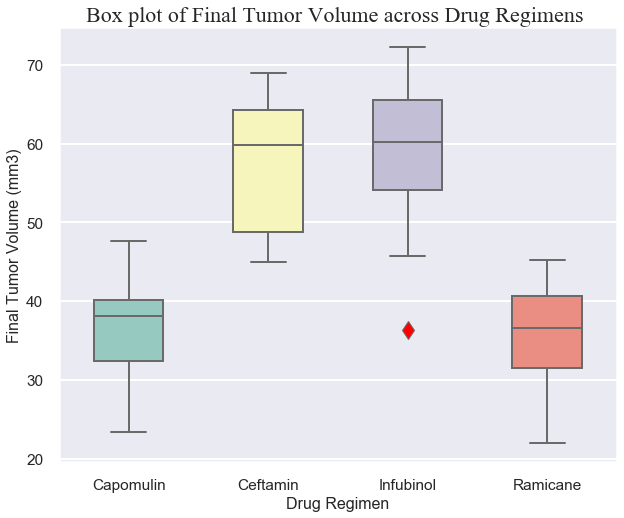

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=0.7, rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Adjust the display of outlier by setting flierprops
flierprops = dict(markerfacecolor="r",markersize=13,linestyle="none")
# Create the plot
sns.boxplot(x = df_top_four["Drug Regimen"], \
            y = df_top_four["End_tumor_vol"],\
            width = 0.5,\
            palette = "Set3",\
            flierprops = flierprops,\
            linewidth = 2
           )
# Give our chart x & y-axis labels and a title
plt.title("Box plot of Final Tumor Volume across Drug Regimens ",fontsize=22,**titlefont)
plt.xlabel("Drug Regimen",fontsize = 16,**labelfont)
plt.ylabel("Final Tumor Volume (mm3)",fontsize = 16,**labelfont)
plt.show()

# Line and scatter plots

### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [42]:
# Let's select the Drug Regimen "Capomulin" and store it's time series in a dataframe
df_Capomulin_time = df_combined[df_combined["Drug Regimen"].isin(["Capomulin"])]
# Let's reset index in the new dataframe
df_Capomulin_time.reset_index(drop = True, inplace=True)
print('\033[94m'+'\033[1m'+"The shape of the {} dataframe is:{}" \
      .format("Capomulin",df_Capomulin_time.shape)+'\033[0m')
df_Capomulin_time.head()

The shape of the Capomulin dataframe is:(230, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


### Let's select Mouse ID : b128 to generate a line plot of time versus tumor volume

In [43]:
# Let's select the Mouse ID : b128 and store it's time series in a dataframe
df_b128 = df_Capomulin_time.loc[(df_Capomulin_time["Mouse ID"]=="b128"),["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
# Let's reset index in the new dataframe
df_b128.reset_index(drop = True, inplace=True)
print('\033[94m'+'\033[1m'+"The shape of the {} dataframe is:{}" \
      .format("b128",df_b128.shape)+'\033[0m')
df_b128.head()

The shape of the b128 dataframe is:(10, 3)


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,b128,0,45.000000
1,b128,5,45.651331
2,b128,10,43.270852
3,b128,15,43.784893
4,b128,20,42.731552


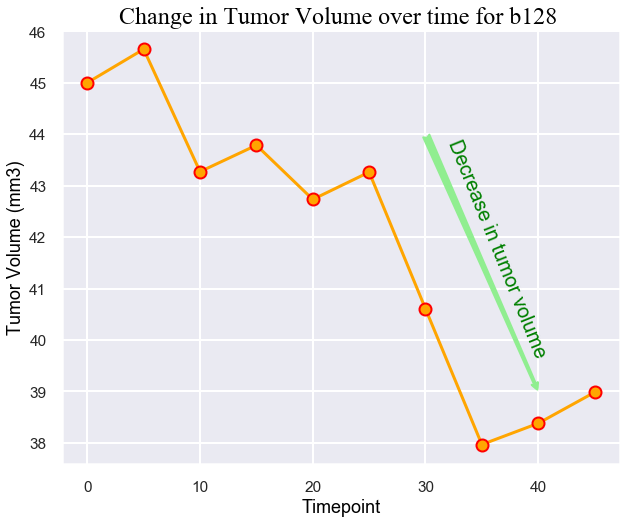

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=0.7, rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = df_b128["Timepoint"], \
            y = df_b128["Tumor Volume (mm3)"],\
            linestyle = "solid", color = "orange",\
            linewidth = 3, marker = "o", markeredgecolor = "red",\
            markeredgewidth = 2)
# Display x & y-axis labels and a title for the lineplot
plt.title("Change in Tumor Volume over time for b128 ",fontsize=24,color="black",**titlefont)
plt.xlabel("Timepoint",fontsize = 18,color="black",**labelfont)
plt.ylabel("Tumor Volume (mm3)",fontsize = 18,color="black",**labelfont)
# Annotate arrow
plt.annotate("",xy=(40,39),xytext = (30,44),\
             arrowprops = dict(arrowstyle = "fancy",connectionstyle="arc3",color = "lightgreen"))
# Annotate text
plt.annotate("Decrease in tumor volume",xy=(41,39.6),rotation = 292, fontsize=20,\
             va = "bottom", ha = "right",color = "green",**labelfont)
plt.show()

### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [45]:
# Let's groupby Tumor volume (mm3) in the df_Capomulin_time Dataframe by each mouse weight
grped_tumor_weigh = df_Capomulin_time["Tumor Volume (mm3)"].groupby(df_Capomulin_time["Weight (g)"]) # Create a GroupBy object
# Let's create a dataframe with the average tumor volume change for each mouse weight
tumor_vs_weigh = round(grped_tumor_weigh.mean(),3).to_frame("Mean Vol (mm3)").reset_index()
print('\033[94m'+'\033[1m'+"The shape of the {} dataframe is:{}" \
      .format("tumor_vs_weigh",tumor_vs_weigh.shape)+'\033[0m')
tumor_vs_weigh.head() # Display the dataframe

The shape of the tumor_vs_weigh dataframe is:(9, 2)


,Weight (g),Mean Vol (mm3)
0,15,36.182
1,17,37.214
2,19,41.182
3,20,39.141
4,21,42.089


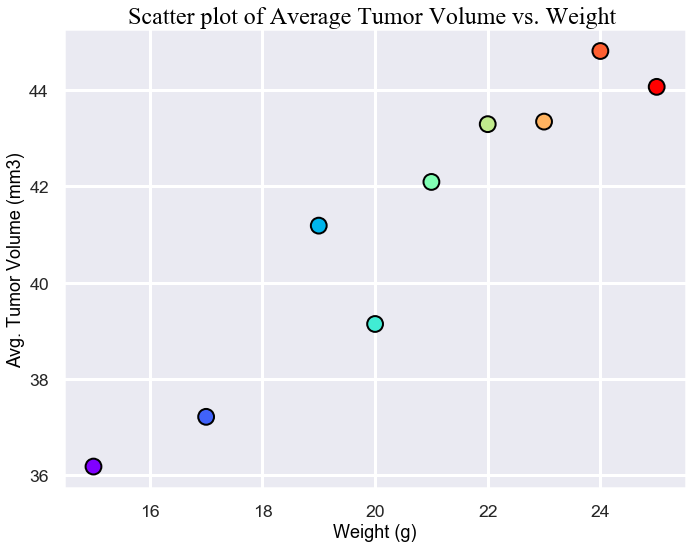

In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=0.8, rc={"grid.linewidth":3})
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Make a color map
t = np.arange(len(tumor_vs_weigh["Weight (g)"]))
# Create a scatter plot
plt.scatter(x = tumor_vs_weigh["Weight (g)"],\
            y = tumor_vs_weigh["Mean Vol (mm3)"],\
            edgecolor = "black",\
            s = 250,\
            c = t,\
            cmap = "rainbow"\
           )
# Display x & y-axis labels and a title for the lineplot
plt.title("Scatter plot of Average Tumor Volume vs. Weight ",color="black",fontsize=24,**titlefont)
plt.xlabel("Weight (g)",fontsize = 18,color="black",**labelfont)
plt.ylabel("Avg. Tumor Volume (mm3)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
plt.show()

## Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

Correlation Coefficient (R-squared):0.951
p-value (level of statistical significance):8.45e-05
Standard error of estimate:0.111


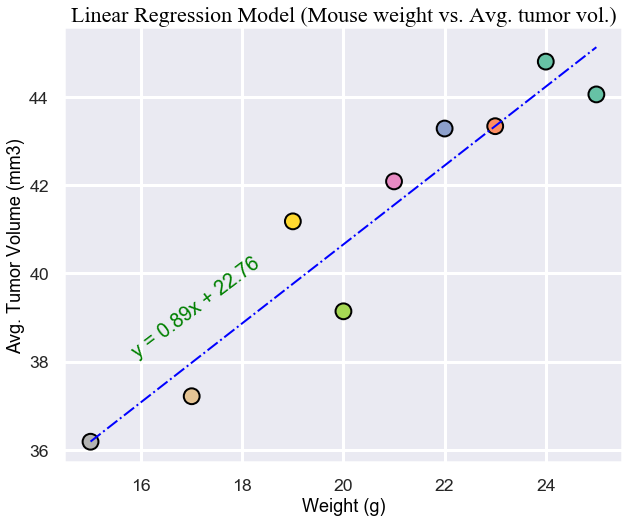

In [47]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=0.8, rc={"grid.linewidth":3})
# Define the figure size
fig = plt.figure(figsize=(10,8))
# Make a color map
t = np.arange(len(tumor_vs_weigh["Weight (g)"]))
# Define x & y data
x_data = tumor_vs_weigh["Weight (g)"]
y_data = tumor_vs_weigh["Mean Vol (mm3)"]
# Let's check pearson coefficient
p_corr = st.pearsonr(x_data,y_data)
# Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
# Calculated y_model from the Model
y_model = x_data * slope + intercept
# Equation of the line from the Linear Regression Model
Model_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create a scatter plot of the data set
plt.scatter(x = x_data,\
            y = y_data,\
            edgecolor = "black",\
            s = 250,\
            c = t,\
            cmap = "Set2_r"\
           )
# Plot the Linear regression model
plt.plot(x_data,y_model,color="blue",linestyle ="dashdot",linewidth=2)
# Annotate the equation
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.annotate( Model_eqn,xy=(15.75,38),rotation = 37, fontsize = 20,\
             va = "bottom", ha = "left",color = "green",**labelfont)
# Display x & y-axis labels and a title for the lineplot
plt.title("Linear Regression Model (Mouse weight vs. Avg. tumor vol.)",fontsize=22,color = "black",**titlefont)
plt.xlabel("Weight (g)",fontsize = 18,color="black",**labelfont)
plt.ylabel("Avg. Tumor Volume (mm3)",fontsize = 18,color="black",**labelfont)
print('\033[92m'+'\033[1m'+"Correlation Coefficient (R-squared):{}" \
      .format(round(rvalue,3))+'\033[0m')
print('\033[94m'+'\033[1m'+"p-value (level of statistical significance):{}" \
      .format(round(pvalue,7))+'\033[0m')
print('\033[96m'+'\033[1m'+"Standard error of estimate:{}" \
      .format(round(stderr,3))+'\033[0m')
plt.show()